In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_stata('pwt91.dta')#.set_index(['countrycode','year'])
df['lab'] = df['labsh']*(np.log(df['emp']*df['hc']).diff()+np.log(df['avh']).diff().fillna(0))
df['cap'] = (1-df['labsh'])*np.log(df['rkna']).diff()
df['tfp'] = np.log(df['rgdpna']).diff()-df['lab']-df['cap']
df['g'] = np.log(df['rgdpna']).diff()

df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,lab,cap,tfp,g
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
pd.pivot_table(df,index=['country','year'],values=['lab','cap','tfp','g']).reset_index().to_excel('growth_accounting.xlsx')

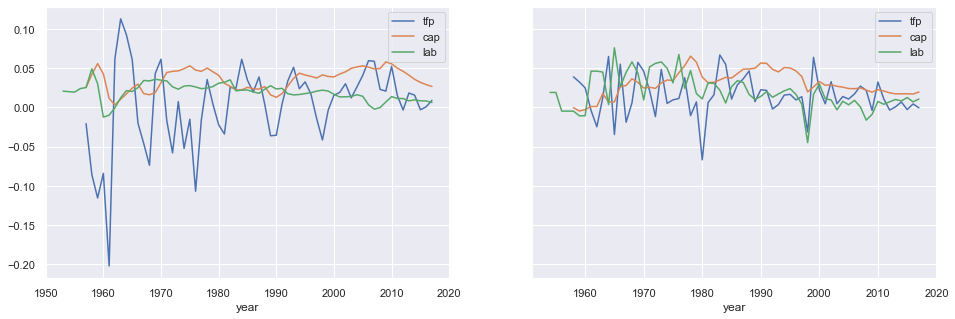

In [34]:
fig, ax = plt.subplots(1,2,figsize=(16,5),sharey=True)

df.loc['CHN',['tfp','cap','lab']].plot(ax=ax[0])
df.loc['KOR',['tfp','cap','lab']].plot(ax=ax[1])

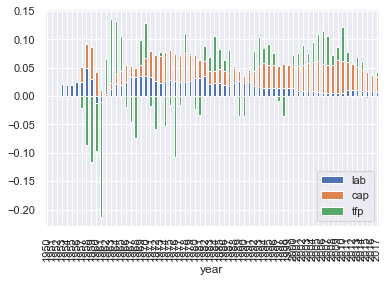

In [17]:
df.loc['CHN',['lab','cap','tfp']].plot.bar(stacked=True)